[View in Colaboratory](https://colab.research.google.com/github/marijusambrozas/JupyterWorkflow/blob/master/Antra_MarijusAmbrozas.ipynb)

In [0]:
from matplotlib import interactive
interactive(True)
%matplotlib qt

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/DAM"

Antra_MarijusAmbrozas.ipynb
Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv


In [0]:
def convert_date(date):
    d = date.split()
    month_day_year = d[0]
    time = d[1]
    am_pm = d[2]
    
    mdy = month_day_year.split('/')
    m = float(mdy[0])
    d = float(mdy[1])
    y = float(mdy[2])
    
    t = float(time.split(':')[0])
    if t == '12':
        t = '0'
        
    t = float(t)
    
    if am_pm == 'PM':
        t += 12.    
    d = d + t / 24.
    year = y + (d / 31. + m - 1) / 12.
    return year

import datetime as dt
def convert_date_smart(d):
    date = dt.datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p').date()
    time = dt.datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p').time()
    return date, time

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/DAM/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv'
Date = []
East = []
West = []
Time = []
f = open(path, 'r')
for i, line in enumerate(f):
    if i != 0:
        l = line.split(',')
        date, time = convert_date_smart(l[0])
        east = l[1]
        west = l[2]
        west = west.replace('\n', '')
        if east != '' and west != '':
            east = float(east)
            west = float(west)
            Date.append(date)
            East.append(east)
            West.append(west)
            Time.append(time)
    

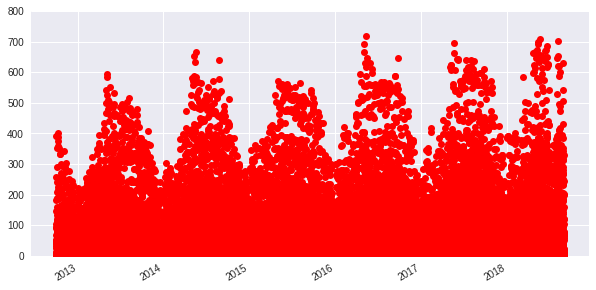

In [0]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(10, 5))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.ylim(0, 800)
#plt.xlim(2010, 2020)
plt.plot_date(Date, East, lw=0.3, c='r')
#plt.plot_date(Date, East, lw=0.3, c='r')
#plt.plot_date(Date, East, fmt="r-")
#plt.plot(Date, East, lw=0.3, c='k')
#plt.plot(Date, West, lw=0.5)
plt.gcf().autofmt_xdate()

####Čia pakopijavau nuo Mato.

In [0]:
date_time = []
for i in range(len(Date)):
  date_time.append(dt.datetime.combine(Date[i], Time[i]))
print (date_time[1])

2012-10-03 01:00:00


(734779.0, 736937.0)

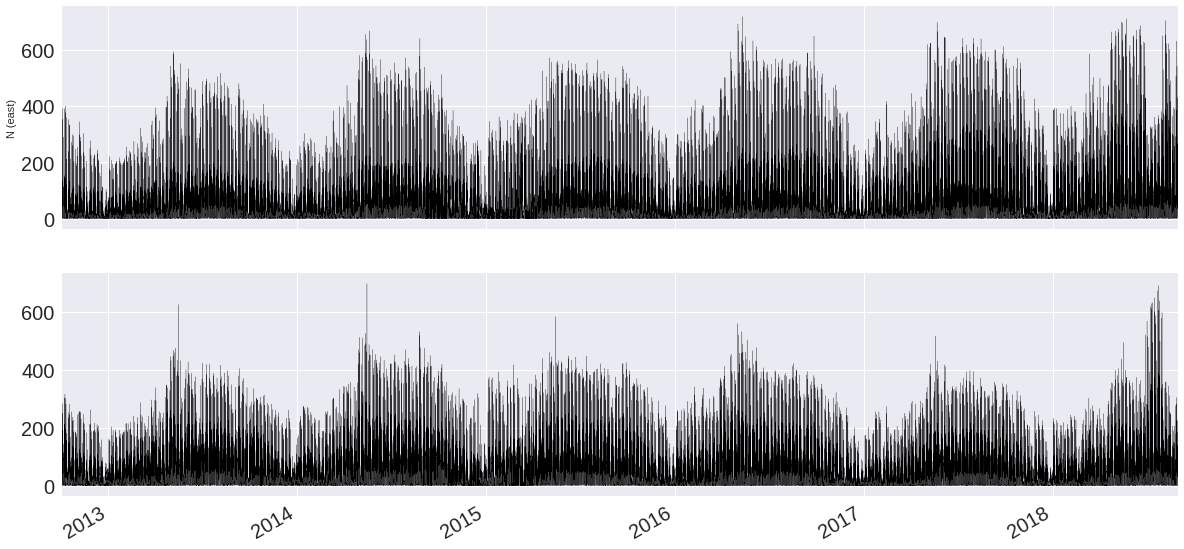

In [0]:
figmain, fig2 = plt.subplots(2, 1, figsize=(20, 10))
figmain.autofmt_xdate()
#plt.ylim(0, 800)

fig2[0].plot(date_time, East, lw=0.2, c='k')
fig2[0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d %I:%M:%S')
fig2[0].tick_params(axis='x', which='both', labelsize=1, labelbottom=True)
fig2[0].tick_params(axis='y', which='both', labelsize=20, labelbottom=True)
fig2[0].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
fig2[0].set_ylabel('N (east)')

fig2[1].plot(date_time, West, lw=0.2, c='k')
fig2[1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d  %I:%M:%S')
fig2[1].tick_params(axis='both', which='both', labelsize=20, labelbottom=True)
fig2[1].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])


####Jeigu paimi mažesnius tarpus, rodo mėnesius ir dienas, ir net valandas, bet nerodo minučių ir sekundžių.

(736936.75, 736937.0)

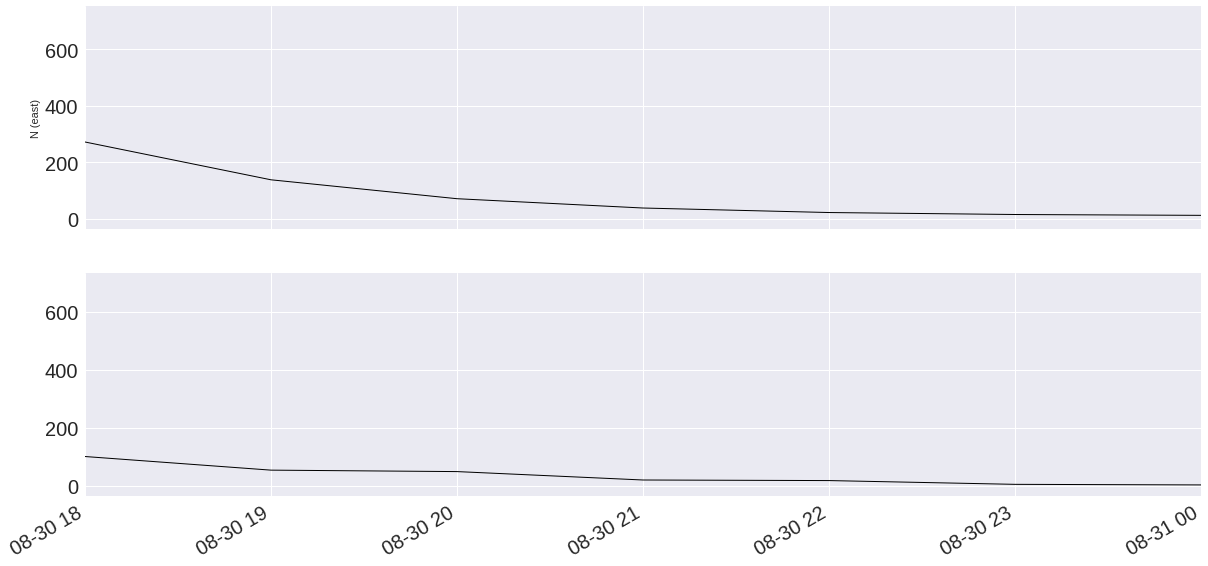

In [0]:
figmain, fig2 = plt.subplots(2, 1, figsize=(20, 10))
figmain.autofmt_xdate()
#plt.ylim(0, 800)

fig2[0].plot(date_time, East, lw=1, c='k')
fig2[0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d %I:%M:%S')
fig2[0].tick_params(axis='x', which='both', labelsize=1, labelbottom=True)
fig2[0].tick_params(axis='y', which='both', labelsize=20, labelbottom=True)
fig2[0].set_xlim([dt.datetime(2018, 8, 30, 18, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
fig2[0].set_ylabel('N (east)')

fig2[1].plot(date_time, West, lw=1, c='k')
fig2[1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d  %I:%M:%S')
fig2[1].tick_params(axis='both', which='both', labelsize=20, labelbottom=True)
fig2[1].set_xlim([dt.datetime(2018, 8, 30, 18, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])

###Bandžiau padaryti pagal:

###https://matplotlib.org/examples/api/date_index_formatter.html

In [0]:
import matplotlib.mlab as mlab
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

datafile = cbook.get_sample_data(path, asfileobj=False)
print('loading %s' % datafile)
r = mlab.csv2rec(datafile)

loading /content/drive/My Drive/Colab Notebooks/DAM/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv


In [0]:
r.sort()
print(r.date)
rwest = []
reast = []
for i in range(len(r)):
  reast.append(r[i][1])
  rwest.append(r[i][2])
rwest = np.array(rwest)
reast = np.array(reast)

[datetime.datetime(2012, 10, 3, 0, 0) datetime.datetime(2012, 10, 3, 1, 0)
 datetime.datetime(2012, 10, 3, 2, 0) ...
 datetime.datetime(2018, 8, 31, 21, 0)
 datetime.datetime(2018, 8, 31, 22, 0)
 datetime.datetime(2018, 8, 31, 23, 0)]


###`r.date` grąžina visas datas iš failo.

###Pavyzdyje kitos vertės buvo imamos su `r.adj_close` bet čia neveikia. Todėl tiesiog išsikėliau vertes į kitus masyvus.

[    0     1     2 ... 51813 51814 51815]


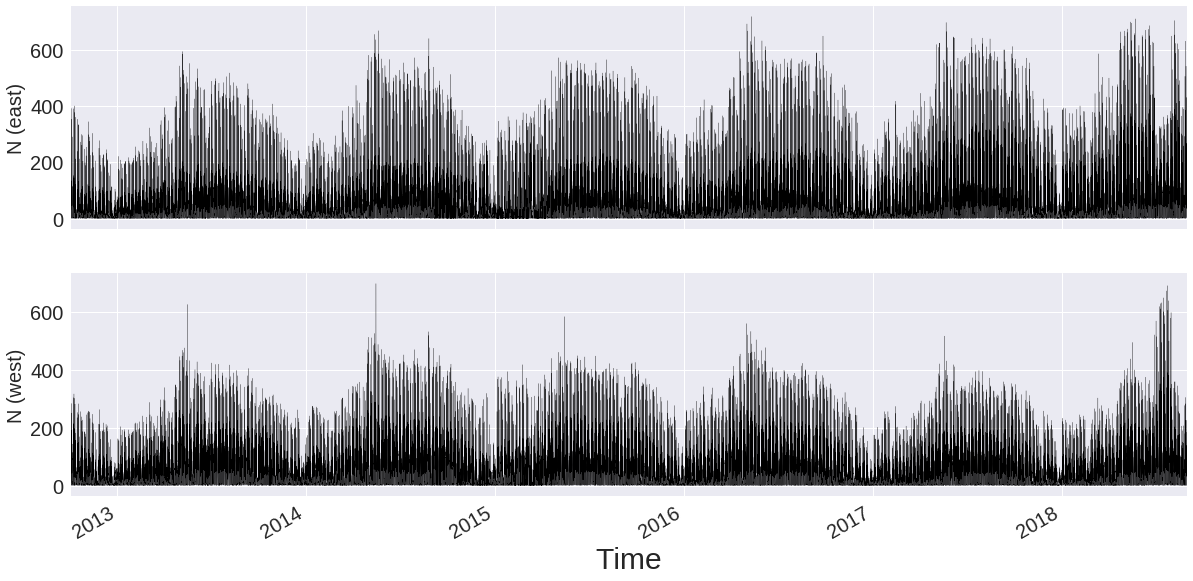

In [0]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(r.date, reast, lw=0.2, c='k')
axes[0].tick_params(axis='x', labelsize=1, labelbottom=True)
axes[0].tick_params(axis='y', labelsize=20, labelbottom=True)
axes[0].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[0].set_ylabel('N (east)', fontsize=20)

axes[1].plot(r.date, rwest, lw=0.2, c='k')
axes[1].tick_params(axis='x', labelsize=20, labelbottom=True)
axes[1].tick_params(axis='y', labelsize=20, labelbottom=True)
#axes[1].set_xlim([dt.datetime(2018, 8, 30, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[1].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[1].set_ylabel('N (west)', fontsize=20)
axes[1].set_xlabel('Time', fontsize=30)
fig.autofmt_xdate()

N = len(r)
ind = np.arange(N)
print(ind)

# NEVEIKIA KAŽKODĖL
def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N - 1)
    return r.date[thisind].strftime('%Y-%m-%d %I:%M:%S')

#axes[1].plot(ind, rwest, 'o-')
#axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
#fig.autofmt_xdate()

plt.show()

### Rezultatas toks pats, kaip anksčiau gautas.

####„Pasiskolinau“ iš:
####https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy

In [0]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [0]:
#window = 7*24
window = 7*24*30
reast_avg = moving_average(reast, window)
rwest_avg = moving_average(rwest, window)
#print(window)
#print(len(reast))
#print(len(reast_avg))
#print(len(reast)-(window-1))

83


Text(0.5,0,'Time')

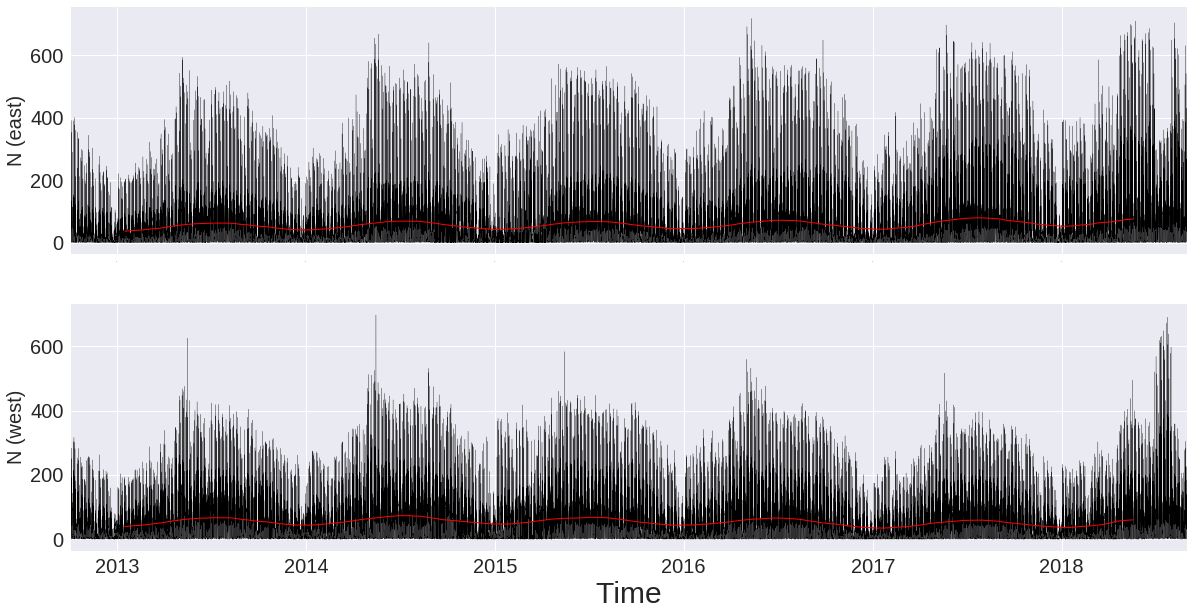

In [0]:
edge_left = 0
edge_right = 0
if (window % 2) == 0:
  edge_left = int ((window - 1) / 2)
  edge_right = int (window / 2)
else:
  edge_left = int ((window - 1) / 2)
  edge_right = edge_left
print(edge)
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(r.date, reast, lw=0.2, c='k')
axes[0].plot(r.date[edge_left:-edge_right], reast_avg, lw=1, c='r')
axes[0].tick_params(axis='x', labelsize=1, labelbottom=True)
axes[0].tick_params(axis='y', labelsize=20, labelbottom=True)
axes[0].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[0].set_ylabel('N (east)', fontsize=20)

axes[1].plot(r.date, rwest, lw=0.2, c='k')
axes[1].plot(r.date[edge_left:-edge_right], rwest_avg, lw=1, c='r')
axes[1].tick_params(axis='x', labelsize=20, labelbottom=True)
axes[1].tick_params(axis='y', labelsize=20, labelbottom=True)
#axes[1].set_xlim([dt.datetime(2018, 8, 30, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[1].set_xlim([dt.datetime(2012, 10, 3, 0, 0, 0), dt.datetime(2018, 8, 31, 0, 0, 0)])
axes[1].set_ylabel('N (west)', fontsize=20)
axes[1].set_xlabel('Time', fontsize=30)
#fig.autofmt_xdate()
